# This Lab is completed at the end of previous lab. Please scroll down

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Function to import and clean the data

In [2]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Thanks to ISI for the idea to separate the numeric and Strings variables
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    #print(null_columns)
    #Put 0 in those which have nulls.
    for  Column_to_change in null_columns:
        df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    #print(null_columns)
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('The features in this dataframe are: \n')
    data_frame_output.info(
    )
    return data_frame_output

# Here is Round 3 Starting

In [ ]:
#Here I use the function created in round 2 to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df_round3_start=DATA_FRAME_CLEAN(data_frame_input)
df_round3_start

In [ ]:
#Here is the description of this dataframe
df_round3_start.describe()

In [ ]:
#Plot the total number of responses by category
df_round3_start['RESPONSE'].hist()
plt.show()
df_round3_start['RESPONSE'].value_counts()

In [ ]:
#Calculate response rate
#I create a table with values 1 and 0 to be able to sum 
df_work=df_round3_start
df_work['RATE_DUM'] = np.where(df_work['RESPONSE'] == 'Yes',1,0)
df_work.sample(10)

In [ ]:
#Print the response rate by sales channel
grouped=df_work.groupby('SALES_CHANNEL')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['SALES_CHANNEL','RATE']]
#grouped['RATE']=grouped['RATE']=(grouped(sum)/grouped(count))*100
#grouped.plot(kind='bar')
grouped.plot.bar(x='SALES_CHANNEL',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the sales channel")
plt.xlabel('SALES_CHANNEL')
plt.ylabel('RESPONSE RATE')
plt.show()

In [ ]:
#Show distribution of total claim amount by response
data_plot_2 = df_work[(df_work['RESPONSE']=='Yes') | (df_work['RESPONSE'] == 'No')]
sns.boxplot(x='RESPONSE', y='TOTAL_CLAIM_AMOUNT', data=data_plot_2)
plt.show()

In [ ]:
#Show distribution of income by response
data_plot_2 = df_work[(df_work['RESPONSE']=='Yes') | (df_work['RESPONSE'] == 'No')]
sns.boxplot(x='RESPONSE', y='INCOME', data=data_plot_2)
plt.show()

In [ ]:
#Show the rate of response per total claim amount (I have binned the Total claim amount)
#Code from NATI
bins = [0, 200, 400, 600, 1000, 3000]
labels = ['0-200', '200-400', '400-600', '600-1000', '1000-3000']
df_work['binned'] = pd.cut(df_work['TOTAL_CLAIM_AMOUNT'], bins=bins, labels=labels) # Bin the "total_claim_amount" column into ranges
#Calculate the rate per bin
grouped=df_work.groupby('binned')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['binned','RATE']]
grouped.plot.bar(x='binned',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the total claim amount")
plt.xlabel('TOTAL_CLAIM_AMOUNT')
plt.ylabel('Rate')
plt.show()



In [ ]:
#Show the rate of response per income (I have binned the income)
#Code from NATI
bins = [0, 20000, 34000, 37700, 62000, 100000]
labels = ['0-20000', '20000-34000', '34000-37700', '37700-62000', '62000-100000']
df_work['binned'] = pd.cut(df_work['INCOME'], bins=bins, labels=labels) # Bin the "total_claim_amount" column into ranges
#Calculate the rate per bin
grouped=df_work.groupby('binned')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['binned','RATE']]
grouped.plot.bar(x='binned',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the Income")
plt.xlabel('Income')
plt.ylabel('RATE')
plt.show()

# Here Starts Round 4

In [ ]:
#Here I use the function created in round 2 to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df_round4_start=DATA_FRAME_CLEAN(data_frame_input)
df_round4_start

In [ ]:
#Check data types for different columns
X_num = df_round4_start.select_dtypes(include = np.number) #numerical columns
X_cat = df_round4_start.select_dtypes(include = np.object) #categoricals columns
#EFFECTIVE_TO_DATE is deleted as it is either numerical nor Categorical

In [ ]:
#Print a sample of numerical features dataframe
X_num.sample(5)

In [ ]:
#Print a sample of categorical features dataframe
X_cat.sample(5)

In [ ]:
# Print the dristribution plots for the numerical values. 
for column in X_num.columns:
    sns.distplot(X_num[column])
    plt.show()

In [ ]:
# Print the histograms plots for the numerical values with matplotlib. 
for column in X_num.columns:
    plt.hist(X_num[column],color="orange") #Print
    plt.xlabel(column) #Change x Label
    plt.show()

In [ ]:
X_num.columns

In [ ]:
#I remove the outliers from each variable
#Check the outliers
sns.boxplot(x=X_num['CUSTOMER_LIFETIME_VALUE'] ,whis=1.5)
#We keep the outliers. There is a lot of records and I am not sure if I can delete high values of customer lifetime value

In [ ]:
iqr = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],75) - np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],25) # data['IC1'].quantile(0.75)
iqr
# define the limits
upper_limit = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],75) + 1.5*iqr
lower_limit = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],25) - 1.5*iqr
upper_limit, lower_limit


In [ ]:
#Check the outliers
sns.boxplot(x=X_num['INCOME'] ,whis=1.5)

In [ ]:
#Check the outliers
sns.boxplot(x=X_num['MONTHLY_PREMIUM_AUTO'] ,whis=1.5)

In [ ]:
#Check the outliers
sns.boxplot(x=X_num['MONTHS_SINCE_LAST_CLAIM'] ,whis=1.5)

In [ ]:
#Check the outliers
sns.boxplot(x=X_num['MONTHS_SINCE_POLICY_INCEPTION'] ,whis=1.5)

In [ ]:
#Check the outliers
sns.boxplot(x=X_num['NUMBER_OF_POLICIES'] ,whis=1.5)
#Do not remove this is a numerical discrete

In [ ]:
#Check the outliers
sns.boxplot(x=X_num['TOTAL_CLAIM_AMOUNT'] ,whis=1.5)

In [ ]:
##There are different methods to do this transformation
#I start with Normalization MinMax we put the range between 0 and 1

transformer = MinMaxScaler().fit(X_num) 
x_minmax = transformer.transform(X_num) #Array
X_num_minmax = pd.DataFrame(x_minmax,columns=X_num.columns) ## Convert to dataframe

# Print the dristribution plots for the numerical values. 
for column in X_num_minmax.columns:
    sns.distplot(X_num_minmax[column])
    plt.show()

In [ ]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Standarization to put the mean in 0

transformer = StandardScaler().fit(X_num_minmax)
x_standardized = transformer.transform(X_num_minmax)
X_num_stand = pd.DataFrame(x_standardized, columns=X_num_minmax.columns)

# Print the dristribution plots for the numerical values. 
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

In [ ]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Log Transformation
X_num_log=X_num_stand
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in X_num_log.columns:
    X_num_log[column] = list(map(log_transfom_clean, X_num_log[column])) #Transformation
    X_num_log[column] = X_num_log[column].fillna(np.mean(X_num_log[column]))    #Clean NAN
    
# Print the dristribution plots for the numerical values. 
for column in X_num_log.columns:
    sns.distplot(X_num_log[column])
    plt.show()

In [ ]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
X_num_BC=X_num_stand


for column in X_num_BC.columns:
    X_num_BC[column] = np.where(X_num_BC[column]<=0, np.NAN, X_num_BC[column]) # data['HV1'].mean()
    X_num_BC[column] = X_num_BC[column].fillna(X_num_BC[column].mean())
    transformed_data, _ci = stats.boxcox(X_num_BC[column])
    
# Print the dristribution plots for the numerical values. 
for column in X_num_BC.columns:
    sns.distplot(X_num_BC[column])
    plt.show()

# Check the multicollinearity

In [ ]:
#I separaty total_claim_amount
X_Target=X_num['TOTAL_CLAIM_AMOUNT']
X_num=X_num.drop(columns='TOTAL_CLAIM_AMOUNT')
X_num.sample(4)

In [ ]:
#Check correlation for each feature agaisnt each other
correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
sns.pairplot(X_num)

#There is no strong correlation between variables

In [ ]:
##Moreover number_of_policies and number_of_open_complaints are numerical discrete variables and
#They don´t have to be in a normal distribution. 
#Customer_lifetime_value and monthly_premium auto have a relation but we would need to cluster the diferent lines that we see in the graph above

# Here starts round 6

In [12]:
#Here I use the function created in round 2 to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df_round6_start=DATA_FRAME_CLEAN(data_frame_input)
df_round6_start

The size for this data frame is:  (9134, 24)
Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'TOTAL_CLAIM_AMOUNT',
       'CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')
The features in this dataframe are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 1   INCOME                         9134 non-null   int64         
 2   MONTHLY_PREMIUM_AUTO           9

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,2763.519279,56274,69,32,5,0,1,384.811147,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,14,28,0,1,379.200000,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,790.784983,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,691.200000,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
#Check data types for different columns
X_num = df_round6_start.select_dtypes(include = np.number) #numerical columns
X_cat = df_round6_start.select_dtypes(include = np.object) #categoricals columns
#EFFECTIVE_TO_DATE is deleted as it is either numerical nor Categorical

In [14]:
#I separaty total_claim_amount
X_Target=X_num['TOTAL_CLAIM_AMOUNT']
X_num=X_num.drop(columns='TOTAL_CLAIM_AMOUNT')
X_num.sample(4)


,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES
3387,12689.428040,0,117,4,89,1,2
2605,9824.745841,23923,82,29,61,1,2
763,2163.870179,0,63,0,75,0,1
7579,2382.672856,0,65,24,47,0,1


In [6]:
X_num.shape

(9134, 7)

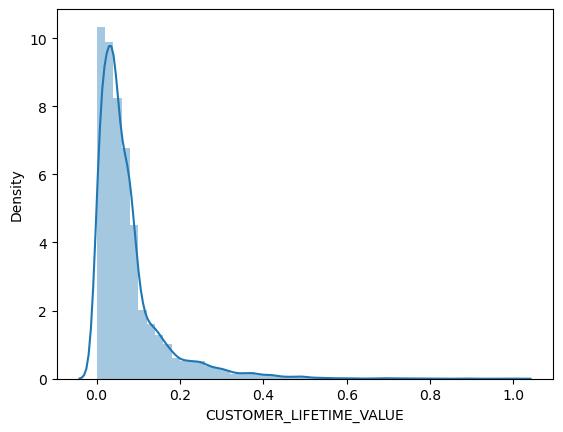

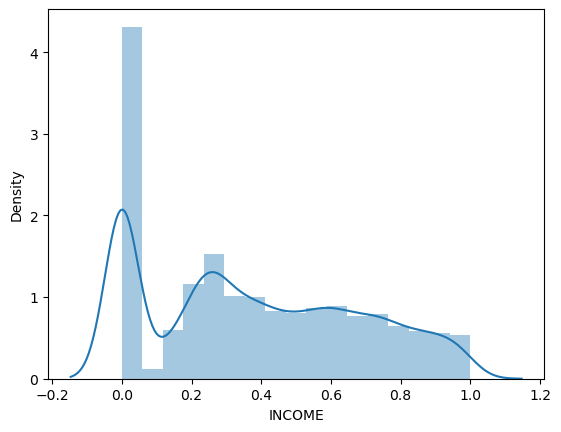

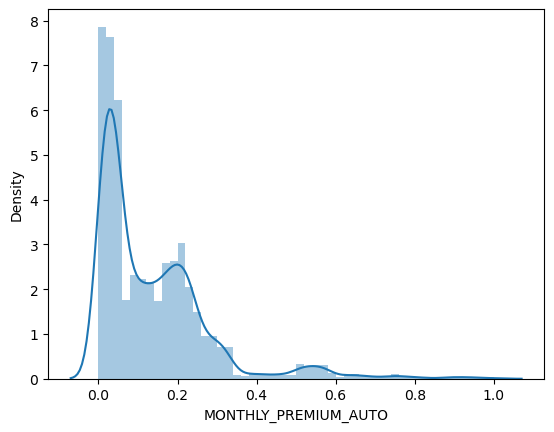

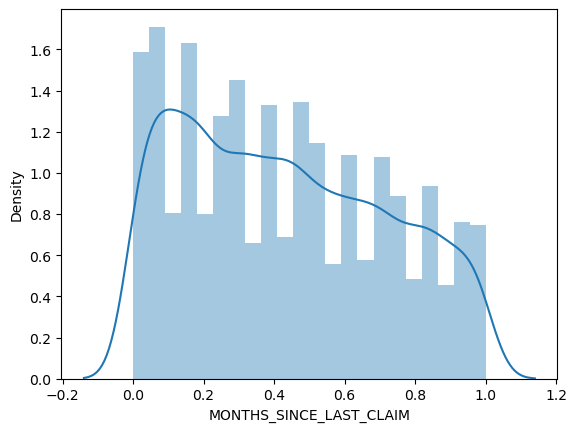

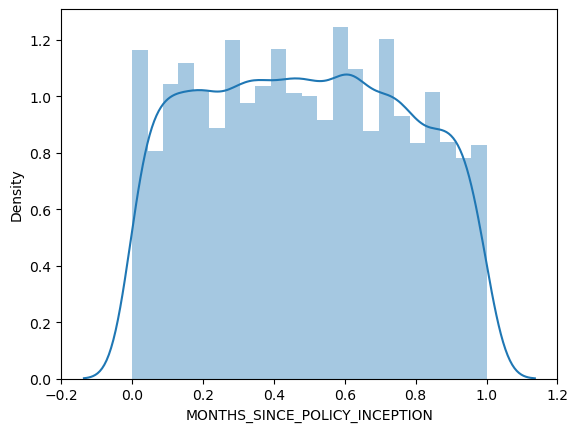

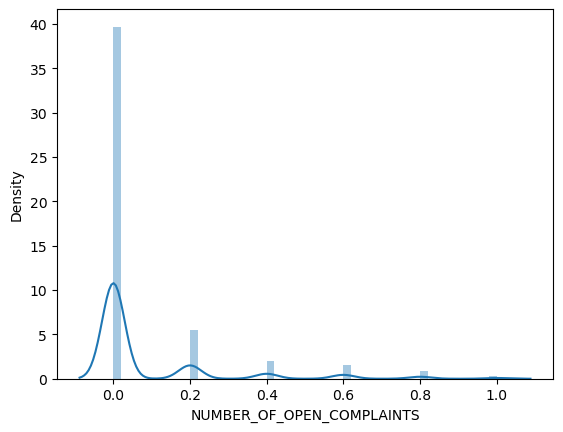

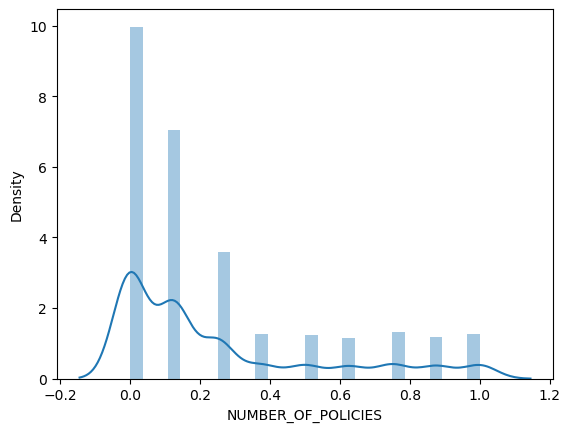

In [15]:
#I start with Normalization MinMax we put the range between 0 and 1

transformer = MinMaxScaler().fit(X_num) 
x_minmax = transformer.transform(X_num) #Array
X_num_minmax = pd.DataFrame(x_minmax,columns=X_num.columns) ## Convert to dataframe

# Print the dristribution plots for the numerical values. 
for column in X_num_minmax.columns:
    sns.distplot(X_num_minmax[column])
    plt.show()

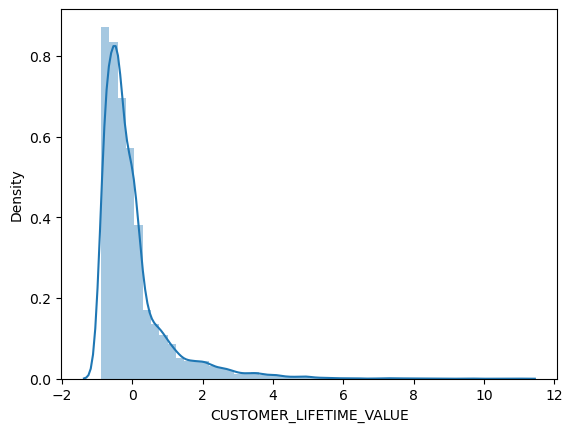

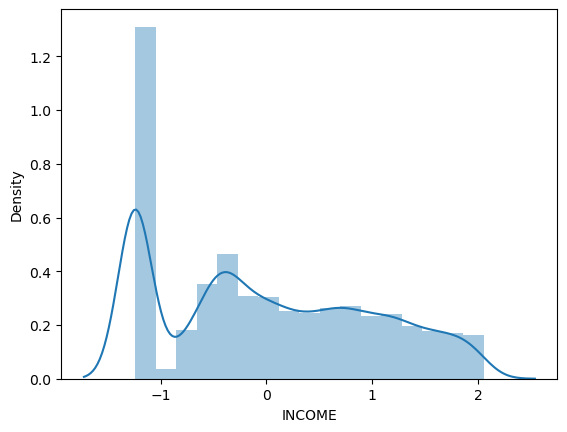

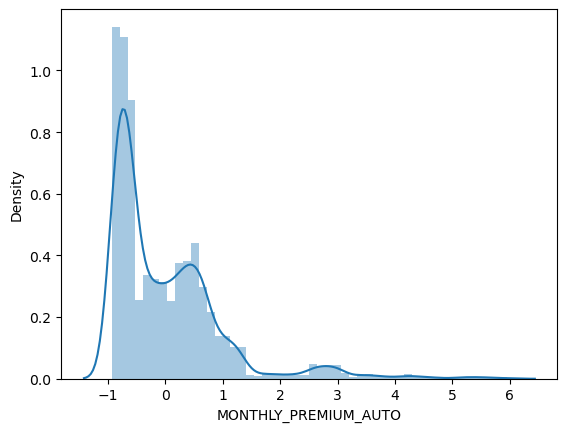

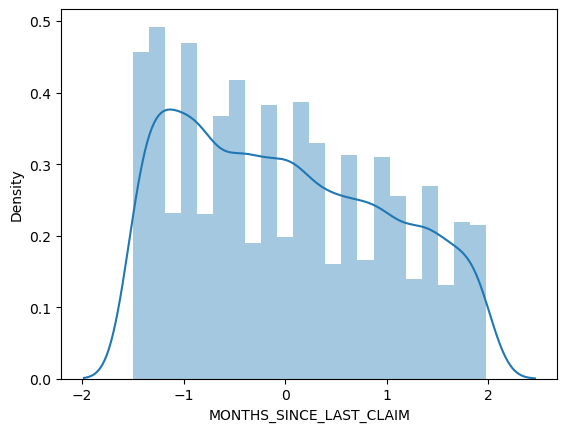

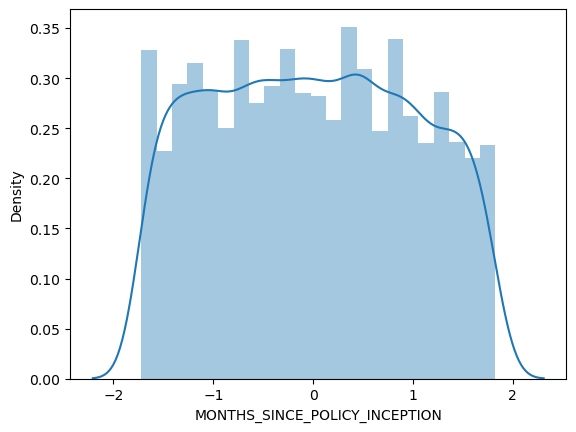

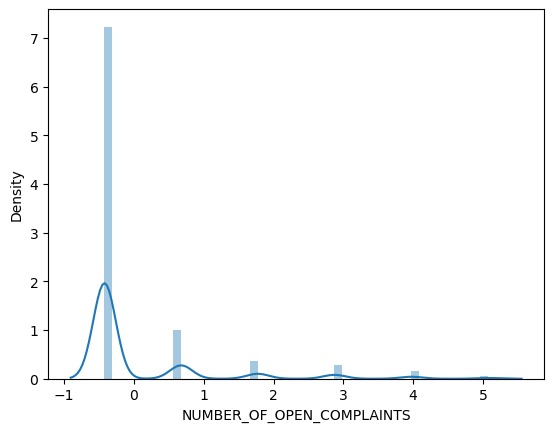

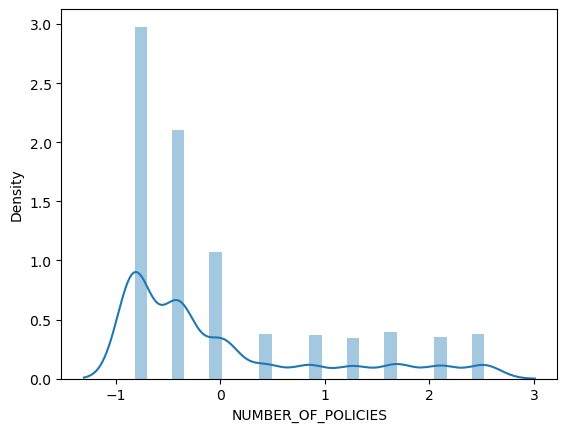

In [16]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Standarization to put the mean in 0

transformer = StandardScaler().fit(X_num_minmax)
x_standardized = transformer.transform(X_num_minmax)
X_num_stand = pd.DataFrame(x_standardized, columns=X_num_minmax.columns)

# Print the dristribution plots for the numerical values. 
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

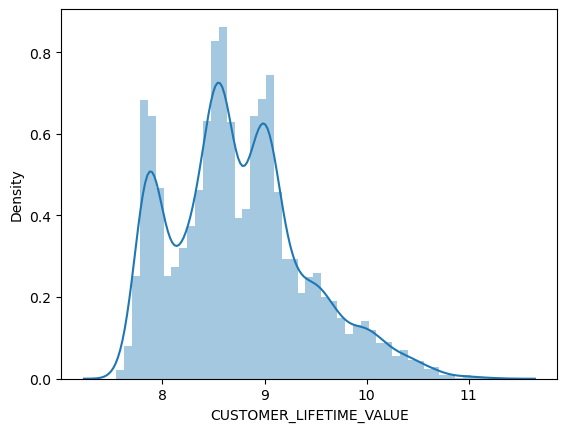

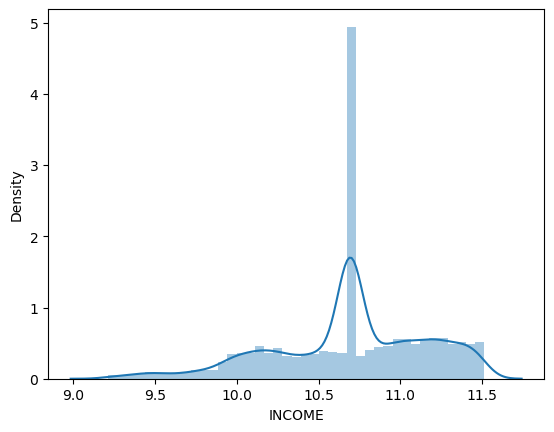

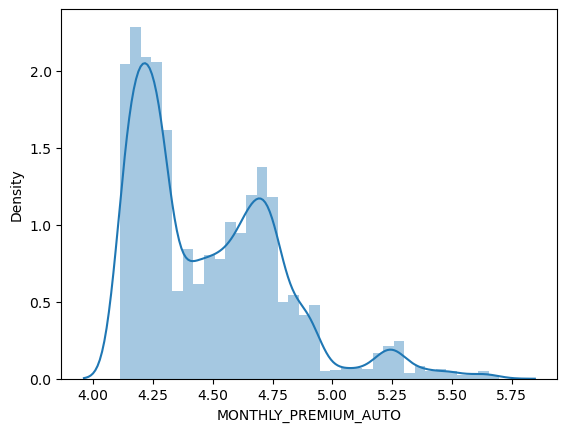

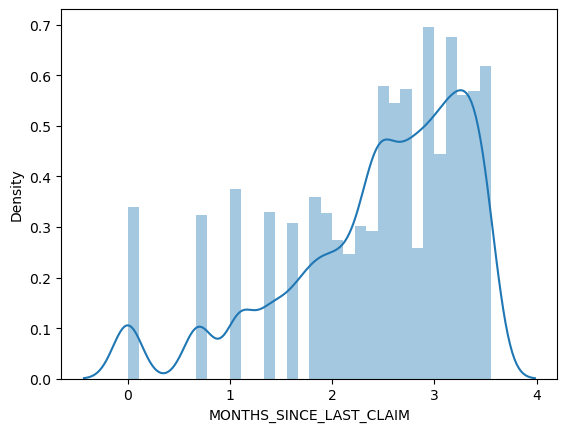

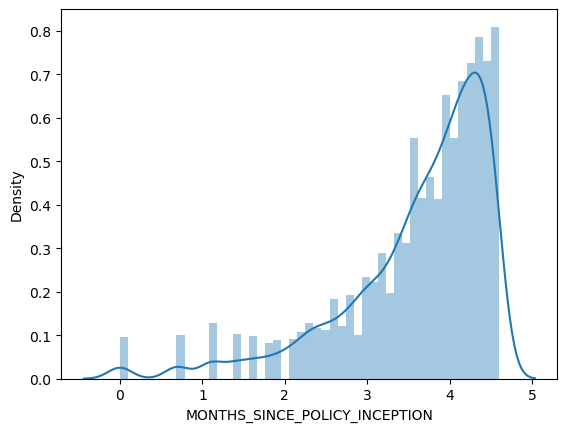

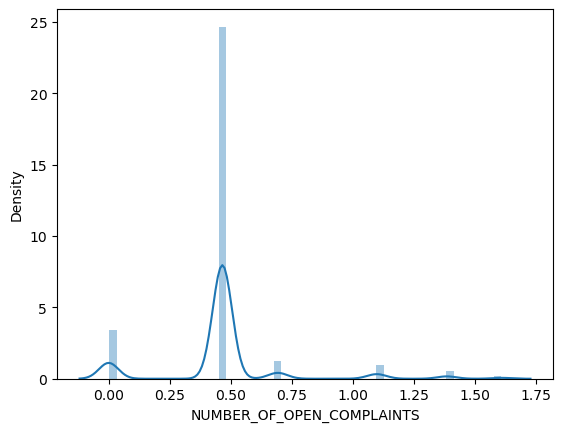

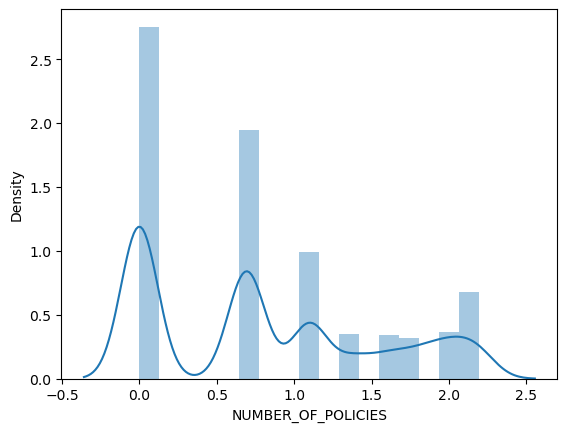

In [17]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Log Transformation
X_num_log=X_num
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in X_num_log.columns:
    X_num_log[column] = list(map(log_transfom_clean, X_num_log[column])) #Transformation
    X_num_log[column] = X_num_log[column].fillna(np.mean(X_num_log[column]))    #Clean NAN
    
# Print the dristribution plots for the numerical values. 
for column in X_num_log.columns:
    sns.distplot(X_num_log[column])
    plt.show()

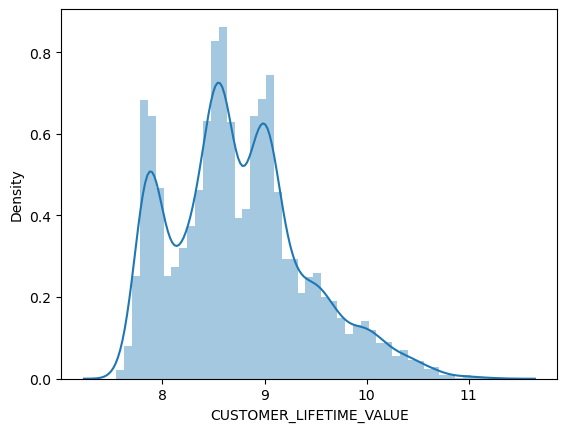

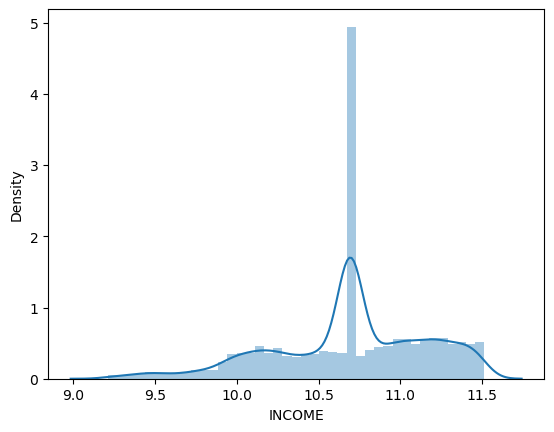

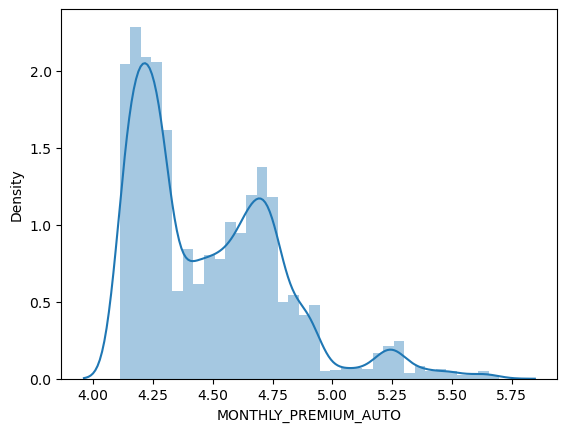

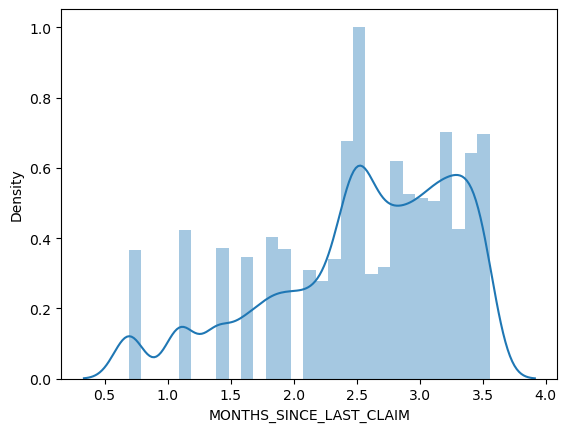

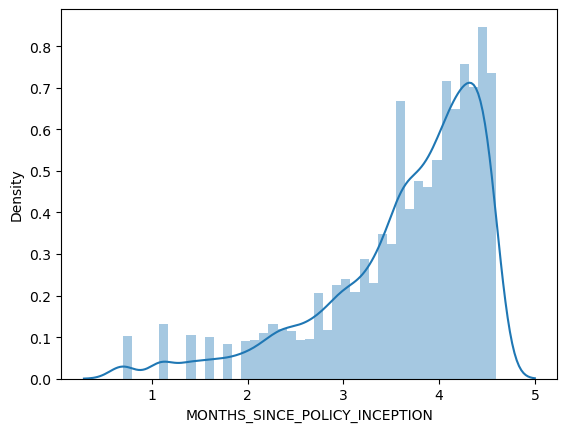

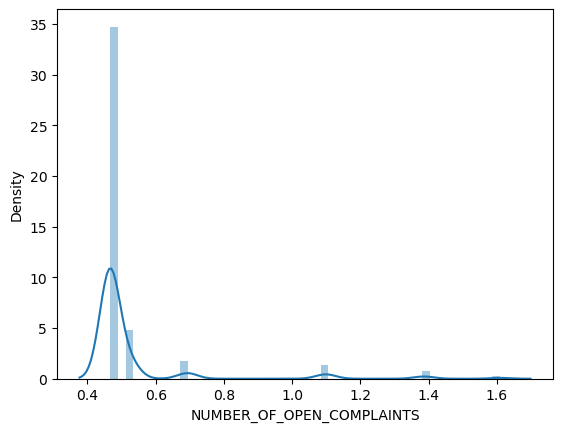

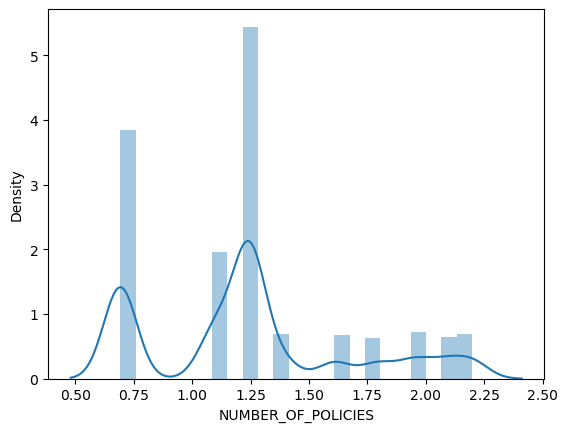

In [18]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
X_num_BC=X_num


for column in X_num_BC.columns:
    X_num_BC[column] = np.where(X_num_BC[column]<=0, np.NAN, X_num_BC[column]) # data['HV1'].mean()
    X_num_BC[column] = X_num_BC[column].fillna(X_num_BC[column].mean())
    transformed_data, _ci = stats.boxcox(X_num_BC[column])
    
# Print the dristribution plots for the numerical values. 
for column in X_num_BC.columns:
    sns.distplot(X_num_BC[column])
    plt.show()

In [19]:
#I haven´t undestood I need to do that en the previous lab. 
#Create a dataframe with the transformed numerical values
#Normalization. Variables with a lot of outlaiers
X_Num_Normalize=X_num_minmax[["CUSTOMER_LIFETIME_VALUE","MONTHLY_PREMIUM_AUTO"]]
#Standarization for variables that don´t have outliers
X_Num_Standarize=X_num_stand[["INCOME","MONTHS_SINCE_LAST_CLAIM","MONTHS_SINCE_POLICY_INCEPTION"]]
#Already numerical ordinal variable
X_Num_NonTransformed=X_num[["NUMBER_OF_OPEN_COMPLAINTS", "NUMBER_OF_POLICIES"]]

X_Num_Final=pd.concat([X_Num_Normalize, X_Num_Standarize,X_Num_NonTransformed], axis=1)
X_Num_Final.reset_index()
X_Num_Final.shape

(9134, 7)

In [20]:
X_Num_Final.sample(20)

,CUSTOMER_LIFETIME_VALUE,MONTHLY_PREMIUM_AUTO,INCOME,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES
9117,0.083929,0.046414,0.445965,-1.101690,0.141031,0.465844,0.693147
5289,0.065121,0.021097,-1.239617,0.089648,1.036945,0.465844,0.693147
1699,0.006813,0.000000,0.497975,-1.300247,1.502821,0.465844,1.243746
8711,0.019783,0.113924,-0.461790,-0.009630,1.180292,0.465844,1.243746
4285,0.121784,0.172996,0.110165,-0.009630,-0.790719,1.098612,0.693147
2918,0.178935,0.008439,-1.239617,-1.101690,0.141031,0.465844,0.693147
2762,0.012498,0.046414,1.499778,-0.903134,-0.217334,0.465844,1.243746
148,0.074794,0.160338,1.305955,-1.498803,-0.969902,0.465844,1.098612
408,0.401749,0.202532,-0.578288,-0.506021,0.391887,0.465844,0.693147
2647,0.007859,0.012658,-0.001494,-1.498803,-0.575700,0.465844,1.243746


In [21]:
#Checking all the categorical columns
X_cat.columns

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS',
       'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [22]:
#Check unique values for each categorical value
for column in X_cat.columns:
    print("This feature ", column ," has ", X_cat[column].nunique(), " categories \n The single values are: ", X_cat[column].unique() )
    print("Here the detail: \n" , X_cat[column].value_counts())
    print("\n\n")

This feature  CUSTOMER  has  9134  categories 
 The single values are:  ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Here the detail: 
 BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: CUSTOMER, Length: 9134, dtype: int64



This feature  STATE  has  5  categories 
 The single values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Here the detail: 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64



This feature  RESPONSE  has  2  categories 
 The single values are:  ['No' 'Yes']
Here the detail: 
 No     7826
Yes    1308
Name: RESPONSE, dtype: int64



This feature  COVERAGE  has  3  categories 
 The single values are:  ['Basic' 'Extended' 'Premium']
Here the detail: 
 Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64



This feature  EDUCATION  has  

In [23]:
#Clean the categorical variables and reduce the unique values
#We drop Customer because is not a variable to predict. This is an ID 
X_cat_temp=X_cat.drop(columns="CUSTOMER")
X_cat_temp.sample(5)

#Groupping EDUCATION. High, medium and low
X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat['EDUCATION'] == 'High School or Below' ,"LOW",X_cat['EDUCATION'])
X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat_temp['EDUCATION_SIMPLE'] == 'College' ,"MEDIUM",X_cat_temp['EDUCATION_SIMPLE'])
X_cat_temp['EDUCATION_SIMPLE'] = np.where((X_cat_temp['EDUCATION_SIMPLE'] == 'Bachelor') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Master') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Doctor') ,"HIGH",X_cat_temp['EDUCATION_SIMPLE'])

#Groupping EMPLOYMENTSTATUS. I try to make bigger groups. employed. unemployed and other
X_cat_temp['EMPLOYMENTSTATUS_SIMPLE'] = np.where((X_cat['EMPLOYMENTSTATUS'] == 'Medical Leave')|(X_cat['EMPLOYMENTSTATUS'] == 'Disabled')| (X_cat['EMPLOYMENTSTATUS'] == 'Retired'),"Other",X_cat['EMPLOYMENTSTATUS'])

#Groupping VEHICLE_CLASS to diminish number of unique variables. Luxury. Sports Car. Four-Door Car includes SUV. Two-Door Car
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat['VEHICLE_CLASS'] == 'SUV',"Four-Door Car",X_cat['VEHICLE_CLASS'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where((X_cat_temp['VEHICLE_CLASS'] == 'Luxury SUV') | (X_cat_temp['VEHICLE_CLASS'] == 'Luxury Car SUV'),"Luxury",X_cat_temp['VEHICLE_CLASS_SIMPLE'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat_temp['VEHICLE_CLASS'] == 'Sports Car',"Two-Door Car",X_cat_temp['VEHICLE_CLASS_SIMPLE'])

#Grouping Policy to reduce unique values. Personal, Corporate and Special
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat['POLICY'] == 'Personal L3') | (X_cat['POLICY'] == 'Personal L2') |(X_cat['POLICY'] == 'Personal L1') ,"Personal",X_cat['POLICY'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Corporate L3') | (X_cat_temp['POLICY'] == 'Corporate L2') |(X_cat_temp['POLICY'] == 'Corporate L1') ,"Corporate",X_cat_temp['POLICY_SIMPLE'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Special L3') | (X_cat_temp['POLICY'] == 'Special L2') |(X_cat_temp['POLICY'] == 'Special L1') ,"Special",X_cat_temp['POLICY_SIMPLE'])

#X_cat_temp.sample(20)
X_cat_final=X_cat_temp.drop(columns=['EDUCATION', 'EMPLOYMENTSTATUS', 'POLICY_TYPE', 'POLICY','VEHICLE_CLASS'])
X_cat_final.columns
#X_cat_final.shape


Index(['STATE', 'RESPONSE', 'COVERAGE', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_SIZE',
       'EDUCATION_SIMPLE', 'EMPLOYMENTSTATUS_SIMPLE', 'VEHICLE_CLASS_SIMPLE',
       'POLICY_SIMPLE'],
      dtype='object')

In [24]:
#Check unique values for each categorical value. AGAIN
for column in X_cat_final.columns:
    print("This feature ", column ," has ", X_cat_final[column].nunique(), " categories \n The single values are: ", X_cat_final[column].unique() )
    print("Here the detail: \n" , X_cat_final[column].value_counts())
    print("\n\n")

This feature  STATE  has  5  categories 
 The single values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Here the detail: 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64



This feature  RESPONSE  has  2  categories 
 The single values are:  ['No' 'Yes']
Here the detail: 
 No     7826
Yes    1308
Name: RESPONSE, dtype: int64



This feature  COVERAGE  has  3  categories 
 The single values are:  ['Basic' 'Extended' 'Premium']
Here the detail: 
 Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64



This feature  GENDER  has  2  categories 
 The single values are:  ['F' 'M']
Here the detail: 
 F    4658
M    4476
Name: GENDER, dtype: int64



This feature  LOCATION_CODE  has  3  categories 
 The single values are:  ['Suburban' 'Rural' 'Urban']
Here the detail: 
 Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64



This feature  MARITA

In [25]:
#Do I need to check with Chi-squared if the categorical variables have relation between them? 
#I think so but for now I don´t know how to do it.
#I need to reduce the number of variables

In [26]:
#Encode
#Response is boolean, We transfor Gender in boolean too.
X_cat_final['RESPONSE_ENC'] = np.where(X_cat_final['RESPONSE'] == 'Yes',1,0)
X_cat_final['GENDER_ENC'] = np.where(X_cat_final['GENDER'] == 'F',1,0)
#I use this method for the Variables that have only three unique values
X_cat_dum1 = pd.get_dummies(X_cat_final[["COVERAGE","LOCATION_CODE","MARITAL_STATUS","VEHICLE_SIZE","EDUCATION_SIMPLE","EMPLOYMENTSTATUS_SIMPLE","POLICY_SIMPLE"]], drop_first=True)
#I use this method for the Variables that have only four or more unique values
X_cat_dum2 = pd.get_dummies(X_cat_final[["STATE","RENEW_OFFER_TYPE","SALES_CHANNEL","VEHICLE_CLASS_SIMPLE"]], drop_first=False)
#Put together all the dataframes
X_cat_enc=pd.concat([X_cat_final, X_cat_dum1,X_cat_dum2], axis=1)
X_cat_enc.reset_index()
X_cat_enc=X_cat_enc.drop(columns=['STATE', 'RESPONSE', 'COVERAGE', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_SIZE',
       'EDUCATION_SIMPLE', 'EMPLOYMENTSTATUS_SIMPLE', 'VEHICLE_CLASS_SIMPLE',
       'POLICY_SIMPLE'])
#X_cat_enc.shape
X_cat_enc.sample(5)



,RESPONSE_ENC,GENDER_ENC,COVERAGE_Extended,COVERAGE_Premium,LOCATION_CODE_Suburban,LOCATION_CODE_Urban,MARITAL_STATUS_Married,MARITAL_STATUS_Single,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small,EDUCATION_SIMPLE_LOW,EDUCATION_SIMPLE_MEDIUM,EMPLOYMENTSTATUS_SIMPLE_Other,EMPLOYMENTSTATUS_SIMPLE_Unemployed,POLICY_SIMPLE_Personal,POLICY_SIMPLE_Special,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_SIMPLE_Four-Door Car,VEHICLE_CLASS_SIMPLE_Luxury,VEHICLE_CLASS_SIMPLE_Luxury Car,VEHICLE_CLASS_SIMPLE_Two-Door Car
6897,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
4722,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
553,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2741,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0
5690,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [27]:
#Final dataset to train the model
#Numerical variables plus categorical already encoded.
X=pd.concat([X_Num_Final, X_cat_enc], axis=1)
X.reset_index()

,index,CUSTOMER_LIFETIME_VALUE,MONTHLY_PREMIUM_AUTO,INCOME,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,RESPONSE_ENC,GENDER_ENC,COVERAGE_Extended,COVERAGE_Premium,LOCATION_CODE_Suburban,LOCATION_CODE_Urban,MARITAL_STATUS_Married,MARITAL_STATUS_Single,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small,EDUCATION_SIMPLE_LOW,EDUCATION_SIMPLE_MEDIUM,EMPLOYMENTSTATUS_SIMPLE_Other,EMPLOYMENTSTATUS_SIMPLE_Unemployed,POLICY_SIMPLE_Personal,POLICY_SIMPLE_Special,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_SIMPLE_Four-Door Car,VEHICLE_CLASS_SIMPLE_Luxury,VEHICLE_CLASS_SIMPLE_Luxury Car,VEHICLE_CLASS_SIMPLE_Two-Door Car
0,0,0.010629,0.033755,0.612827,1.678099,-1.543287,0.465844,1.243746,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,1,0.062406,0.139241,-1.239617,-0.208186,-0.217334,0.465844,2.079442,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,2,0.134960,0.198312,0.365710,0.288205,-0.360680,0.465844,0.693147,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,3,0.070589,0.189873,-1.239617,0.288205,0.606907,0.465844,1.945910,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4,4,0.011245,0.050633,0.203390,-0.307465,-0.145661,0.465844,1.243746,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.264137,0.050633,1.128558,0.288205,1.466984,0.465844,0.693147,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
9130,9130,0.014719,0.075949,-0.528450,-0.108908,-0.719046,0.465844,1.243746,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
9131,9131,0.076951,0.101266,-1.239617,-0.605299,-0.396517,1.098612,0.693147,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
9132,9132,0.069098,0.147679,-0.517356,1.876656,-1.614960,0.465844,1.098612,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [28]:
Y=X_Target

In [29]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [30]:
len(X_train)

6393

In [31]:
len(X_test)

2741

In [32]:
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [34]:
predictions

array([186.5625 , 459.375  , 448.53125, ..., 682.4375 , 120.15625,
       579.03125])

In [35]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7663408872241118
RMSE =  138.11082536378842
MSE =  19074.60008266686


# Here starts round 7

In [67]:
#Trying to improve the model

In [68]:
#Create a dataframe with the scaled numerical values
#Scaled dataframe. I try now logaritmic scaler
X_Num_1=X_num_log
#Already numerical ordinal variable. I don´t see the need to transform this variable
X_Num_NonTransformed=X_num[["NUMBER_OF_OPEN_COMPLAINTS", "NUMBER_OF_POLICIES"]]

X_Num_Final=pd.concat([X_Num_NonTransformed, X_Num_1], axis=1)
X_Num_Final.reset_index()
X_Num_Final.shape

(9134, 9)

In [69]:
#Clean the categorical variables and reduce the unique values
#We drop Customer because is not a variable to predict. This is an ID 
X_cat_temp=X_cat.drop(columns="CUSTOMER")
X_cat_temp.sample(5)

#Groupping EDUCATION. High, medium and low
X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat['EDUCATION'] == 'High School or Below' ,"LOW",X_cat['EDUCATION'])
X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat_temp['EDUCATION_SIMPLE'] == 'College' ,"MEDIUM",X_cat_temp['EDUCATION_SIMPLE'])
X_cat_temp['EDUCATION_SIMPLE'] = np.where((X_cat_temp['EDUCATION_SIMPLE'] == 'Bachelor') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Master') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Doctor') ,"HIGH",X_cat_temp['EDUCATION_SIMPLE'])

#Groupping EMPLOYMENTSTATUS. I try to make bigger groups. employed. unemployed and other
X_cat_temp['EMPLOYMENTSTATUS_SIMPLE'] = np.where((X_cat['EMPLOYMENTSTATUS'] == 'Medical Leave')|(X_cat['EMPLOYMENTSTATUS'] == 'Disabled')| (X_cat['EMPLOYMENTSTATUS'] == 'Retired'),"Other",X_cat['EMPLOYMENTSTATUS'])

#Groupping VEHICLE_CLASS to diminish number of unique variables. Luxury. Sports Car. Four-Door Car includes SUV. Two-Door Car
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat['VEHICLE_CLASS'] == 'SUV',"Four-Door Car",X_cat['VEHICLE_CLASS'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where((X_cat_temp['VEHICLE_CLASS'] == 'Luxury SUV') | (X_cat_temp['VEHICLE_CLASS'] == 'Luxury Car SUV'),"Luxury",X_cat_temp['VEHICLE_CLASS_SIMPLE'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat_temp['VEHICLE_CLASS'] == 'Sports Car',"Two-Door Car",X_cat_temp['VEHICLE_CLASS_SIMPLE'])

#Grouping Policy to reduce unique values. Personal, Corporate and Special
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat['POLICY'] == 'Personal L3') | (X_cat['POLICY'] == 'Personal L2') |(X_cat['POLICY'] == 'Personal L1') ,"Personal",X_cat['POLICY'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Corporate L3') | (X_cat_temp['POLICY'] == 'Corporate L2') |(X_cat_temp['POLICY'] == 'Corporate L1') ,"Corporate",X_cat_temp['POLICY_SIMPLE'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Special L3') | (X_cat_temp['POLICY'] == 'Special L2') |(X_cat_temp['POLICY'] == 'Special L1') ,"Special",X_cat_temp['POLICY_SIMPLE'])

#X_cat_temp.sample(20)
X_cat_final=X_cat_temp.drop(columns=['EDUCATION', 'EMPLOYMENTSTATUS', 'POLICY_TYPE', 'POLICY','VEHICLE_CLASS'])
X_cat_final.columns
#X_cat_final.shape

Index(['STATE', 'RESPONSE', 'COVERAGE', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_SIZE',
       'EDUCATION_SIMPLE', 'EMPLOYMENTSTATUS_SIMPLE', 'VEHICLE_CLASS_SIMPLE',
       'POLICY_SIMPLE'],
      dtype='object')

In [70]:
#Final dataset to train the model
#Numerical variables plus categorical already encoded.
X1=pd.concat([X_Num_Final, X_cat_enc], axis=1)
#X.drop(columns='index')
X1.reset_index()
X1.sample(5)

,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,RESPONSE_ENC,GENDER_ENC,COVERAGE_Extended,COVERAGE_Premium,LOCATION_CODE_Suburban,LOCATION_CODE_Urban,MARITAL_STATUS_Married,MARITAL_STATUS_Single,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small,EDUCATION_SIMPLE_LOW,EDUCATION_SIMPLE_MEDIUM,EMPLOYMENTSTATUS_SIMPLE_Other,EMPLOYMENTSTATUS_SIMPLE_Unemployed,POLICY_SIMPLE_Personal,POLICY_SIMPLE_Special,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_SIMPLE_Four-Door Car,VEHICLE_CLASS_SIMPLE_Luxury,VEHICLE_CLASS_SIMPLE_Luxury Car,VEHICLE_CLASS_SIMPLE_Two-Door Car
1578,0.465844,1.243746,8.359974,11.303833,4.672829,2.944439,3.951244,0.465844,1.243746,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4544,0.465844,0.693147,10.173416,9.825256,4.727388,2.302585,2.708050,0.465844,0.693147,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
6859,0.465844,0.693147,9.915275,10.919986,4.143135,3.555348,4.204693,0.465844,0.693147,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
4050,0.693147,1.609438,8.525448,11.034438,4.158883,0.693147,3.951244,0.693147,1.609438,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
111,0.523823,2.079442,8.930129,10.470419,4.584967,2.772589,0.693147,0.523823,2.079442,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [71]:
Y=X_Target

In [72]:
#Separation between train and test
X1_train, X1_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3, random_state=42) 

In [73]:
len(X1_train)

6393

In [74]:
len(X1_test)

2741

In [75]:
#Train model
model = LinearRegression()
model.fit(X1_train,y_train)

LinearRegression()

In [76]:
#Test model
predictions1  = model.predict(X1_test)
predictions1.shape

(2741,)

In [77]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions1)
RMSE = mean_squared_error(y_test, predictions1, squared=False)
MSE = mean_squared_error(y_test, predictions1)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7518442962130412
RMSE =  142.330668742279
MSE =  20258.019264624356


In [78]:
#Similar result as before. 
#I try box cox transformation

In [79]:
#Create a dataframe with the scaled numerical values
#Scaled dataframe. I try now logaritmic scaler
X_Num_1=X_num_BC
#Already numerical ordinal variable. I don´t see the need to transform this variable
X_Num_NonTransformed=X_num[["NUMBER_OF_OPEN_COMPLAINTS", "NUMBER_OF_POLICIES"]]

X_Num_Final=pd.concat([X_Num_NonTransformed, X_Num_1], axis=1)
X_Num_Final.reset_index()
X_Num_Final.shape

(9134, 9)

In [80]:
#Final dataset to train the model
#Numerical variables plus categorical already encoded.
X2=pd.concat([X_Num_Final, X_cat_enc], axis=1)
#X.drop(columns='index')
X2.reset_index()
X2.sample(5)

,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,RESPONSE_ENC,GENDER_ENC,COVERAGE_Extended,COVERAGE_Premium,LOCATION_CODE_Suburban,LOCATION_CODE_Urban,MARITAL_STATUS_Married,MARITAL_STATUS_Single,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small,EDUCATION_SIMPLE_LOW,EDUCATION_SIMPLE_MEDIUM,EMPLOYMENTSTATUS_SIMPLE_Other,EMPLOYMENTSTATUS_SIMPLE_Unemployed,POLICY_SIMPLE_Personal,POLICY_SIMPLE_Special,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_SIMPLE_Four-Door Car,VEHICLE_CLASS_SIMPLE_Luxury,VEHICLE_CLASS_SIMPLE_Luxury Car,VEHICLE_CLASS_SIMPLE_Two-Door Car
7152,0.465844,1.945910,8.766901,10.750385,4.394449,2.079442,3.258097,0.465844,1.945910,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
1478,0.465844,1.243746,7.897810,9.996932,4.262680,2.449229,4.234107,0.465844,1.243746,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2003,0.465844,1.945910,9.516302,10.694229,5.262690,3.401197,3.637586,0.465844,1.945910,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
1266,0.465844,0.693147,9.372534,10.503175,4.595120,3.295837,4.077537,0.465844,0.693147,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3011,0.523823,1.098612,8.608779,10.933196,4.219508,3.433987,3.401197,0.523823,1.098612,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [81]:
#Separation between train and test
X2_train, X2_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42) 

In [82]:
#Train model
model = LinearRegression()
model.fit(X2_train,y_train)
#Test model
predictions2  = model.predict(X2_test)
predictions.shape
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions2)
RMSE = mean_squared_error(y_test, predictions2, squared=False)
MSE = mean_squared_error(y_test, predictions2)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7518442962130412
RMSE =  142.330668742279
MSE =  20258.019264624356


In [ ]:
#I try changing the test size

In [83]:
#Separation between train and test
X2_train, X2_test, y_train, y_test = train_test_split(X2, Y, test_size=0.15, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X2_train,y_train)
#Test model
predictions2  = model.predict(X2_test)
predictions.shape
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions2)
RMSE = mean_squared_error(y_test, predictions2, squared=False)
MSE = mean_squared_error(y_test, predictions2)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7480339074032991
RMSE =  144.89806240923173
MSE =  20995.448489949616


In [ ]:
#We have less accuracy if I reduce the test size

In [ ]:
#I try changing the enconding from categorical values

In [85]:
#Clean the categorical variables and reduce the unique values
#We drop Customer because is not a variable to predict. This is an ID 
X_cat_temp=X_cat.drop(columns="CUSTOMER")
X_cat_temp.sample(5)

#Groupping EDUCATION. High, medium and low
#X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat['EDUCATION'] == 'High School or Below' ,"LOW",X_cat['EDUCATION'])
#X_cat_temp['EDUCATION_SIMPLE'] = np.where(X_cat_temp['EDUCATION_SIMPLE'] == 'College' ,"MEDIUM",X_cat_temp['EDUCATION_SIMPLE'])
#X_cat_temp['EDUCATION_SIMPLE'] = np.where((X_cat_temp['EDUCATION_SIMPLE'] == 'Bachelor') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Master') |(X_cat_temp['EDUCATION_SIMPLE'] == 'Doctor') ,"HIGH",X_cat_temp['EDUCATION_SIMPLE'])

#Groupping EMPLOYMENTSTATUS. I try to make bigger groups. employed. unemployed and other
#X_cat_temp['EMPLOYMENTSTATUS_SIMPLE'] = np.where((X_cat['EMPLOYMENTSTATUS'] == 'Medical Leave')|(X_cat['EMPLOYMENTSTATUS'] == 'Disabled')| (X_cat['EMPLOYMENTSTATUS'] == 'Retired'),"Other",X_cat['EMPLOYMENTSTATUS'])

#Groupping VEHICLE_CLASS to diminish number of unique variables. Luxury. Sports Car. Four-Door Car includes SUV. Two-Door Car
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat['VEHICLE_CLASS'] == 'SUV',"Four-Door Car",X_cat['VEHICLE_CLASS'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where((X_cat_temp['VEHICLE_CLASS'] == 'Luxury SUV') | (X_cat_temp['VEHICLE_CLASS'] == 'Luxury Car SUV'),"Luxury",X_cat_temp['VEHICLE_CLASS_SIMPLE'])
X_cat_temp['VEHICLE_CLASS_SIMPLE'] = np.where(X_cat_temp['VEHICLE_CLASS'] == 'Sports Car',"Two-Door Car",X_cat_temp['VEHICLE_CLASS_SIMPLE'])

#Grouping Policy to reduce unique values. Personal, Corporate and Special
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat['POLICY'] == 'Personal L3') | (X_cat['POLICY'] == 'Personal L2') |(X_cat['POLICY'] == 'Personal L1') ,"Personal",X_cat['POLICY'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Corporate L3') | (X_cat_temp['POLICY'] == 'Corporate L2') |(X_cat_temp['POLICY'] == 'Corporate L1') ,"Corporate",X_cat_temp['POLICY_SIMPLE'])
X_cat_temp['POLICY_SIMPLE'] = np.where((X_cat_temp['POLICY'] == 'Special L3') | (X_cat_temp['POLICY'] == 'Special L2') |(X_cat_temp['POLICY'] == 'Special L1') ,"Special",X_cat_temp['POLICY_SIMPLE'])

#X_cat_temp.sample(20)
X_cat_final=X_cat_temp.drop(columns=[ 'POLICY','VEHICLE_CLASS'])
X_cat_final.columns
#X_cat_final.shape

Index(['STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENTSTATUS',
       'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS', 'POLICY_TYPE',
       'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_SIZE',
       'VEHICLE_CLASS_SIMPLE', 'POLICY_SIMPLE'],
      dtype='object')

In [87]:
#Encode
#Response is boolean, We transfor Gender in boolean too.
X_cat_final['RESPONSE_ENC'] = np.where(X_cat_final['RESPONSE'] == 'Yes',1,0)
X_cat_final['GENDER_ENC'] = np.where(X_cat_final['GENDER'] == 'F',1,0)
#I use this method for the Variables that have only three unique values
X_cat_dum1 = pd.get_dummies(X_cat_final[["COVERAGE","LOCATION_CODE","MARITAL_STATUS","VEHICLE_SIZE","EDUCATION","EMPLOYMENTSTATUS","POLICY_SIMPLE",'POLICY_TYPE']], drop_first=True)
#I use this method for the Variables that have only four or more unique values
X_cat_dum2 = pd.get_dummies(X_cat_final[["STATE","RENEW_OFFER_TYPE","SALES_CHANNEL","VEHICLE_CLASS_SIMPLE"]], drop_first=False)
#Put together all the dataframes
X_cat_enc=pd.concat([X_cat_final, X_cat_dum1,X_cat_dum2], axis=1)
X_cat_enc.reset_index()
X_cat_enc=X_cat_enc.drop(columns=['STATE', 'RESPONSE', 'COVERAGE', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_SIZE',
       'EDUCATION', 'EMPLOYMENTSTATUS', 'VEHICLE_CLASS_SIMPLE',
       'POLICY_SIMPLE','POLICY_TYPE'])
#X_cat_enc.shape
X_cat_enc.sample(5)

,RESPONSE_ENC,GENDER_ENC,COVERAGE_Extended,COVERAGE_Premium,LOCATION_CODE_Suburban,LOCATION_CODE_Urban,MARITAL_STATUS_Married,MARITAL_STATUS_Single,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small,EDUCATION_College,EDUCATION_Doctor,EDUCATION_High School or Below,EDUCATION_Master,EMPLOYMENTSTATUS_Employed,EMPLOYMENTSTATUS_Medical Leave,EMPLOYMENTSTATUS_Retired,EMPLOYMENTSTATUS_Unemployed,POLICY_SIMPLE_Personal,POLICY_SIMPLE_Special,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_SIMPLE_Four-Door Car,VEHICLE_CLASS_SIMPLE_Luxury,VEHICLE_CLASS_SIMPLE_Luxury Car,VEHICLE_CLASS_SIMPLE_Two-Door Car
4115,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
6649,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
6518,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
8617,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6170,1,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [88]:
#Final dataset to train the model
#Numerical variables plus categorical already encoded. 
#Create a dataframe with the transformed numerical values. I use the one that gave me the best r2
#Normalization. Variables with a lot of outlaiers
X_Num_Normalize=X_num_minmax[["CUSTOMER_LIFETIME_VALUE","MONTHLY_PREMIUM_AUTO"]]
#Standarization for variables that don´t have outliers
X_Num_Standarize=X_num_stand[["INCOME","MONTHS_SINCE_LAST_CLAIM","MONTHS_SINCE_POLICY_INCEPTION"]]
#Already numerical ordinal variable
X_Num_NonTransformed=X_num[["NUMBER_OF_OPEN_COMPLAINTS", "NUMBER_OF_POLICIES"]]

X_Num_Final=pd.concat([X_Num_Normalize, X_Num_Standarize,X_Num_NonTransformed], axis=1)
X_Num_Final.reset_index()
X_Num_Final.shape

X2=pd.concat([X_Num_Final, X_cat_enc], axis=1)
#X.drop(columns='index')
X2.reset_index()
X2.sample(5)
#Separation between train and test
X2_train, X2_test, y_train, y_test = train_test_split(X2, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X2_train,y_train)
#Test model
predictions2  = model.predict(X2_test)
predictions.shape
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions2)
RMSE = mean_squared_error(y_test, predictions2, squared=False)
MSE = mean_squared_error(y_test, predictions2)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7648147736437555
RMSE =  137.92799079095735
MSE =  19024.130643630415


In [ ]:
#Now the result is better